In [134]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
data = pd.read_csv('Housing.csv')
data

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1465896,244316,593,412,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,3123904,390488,734,532,4,4,4,yes,no,no,no,yes,3,no,furnished
2,1519896,379974,498,763,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,1152112,288028,382,754,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,887292,221823,503,441,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,377880,188940,470,402,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,483084,241542,497,486,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,364276,182138,374,487,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,734160,367080,570,644,3,1,1,no,no,no,no,no,0,no,furnished


# Apply univariate analysis on a feature in the given dataset

In [100]:
feature = data['length']

In [101]:
mean_feature = np.mean(feature)
median_feature = np.median(feature)
standardDev_feature = np.std(feature)
variation_feature = np.var(feature)

In [102]:
print("Mean:",mean)
print("Median:",median)
print("Standard Deviation:",standardDev)
print("Variation:",variation)

Mean: 539.1357798165137
Median: 528.0
Standard Deviation: 148.21823701564162
Variation: 21968.645784024913


In [103]:
print("Zscore:")
print(stats.zscore(feature))

Zscore:
0      0.363412
1      1.314711
2     -0.277535
3     -1.060165
4     -0.243801
         ...   
540   -0.466446
541   -0.284282
542   -1.114139
543    0.208235
544   -0.081878
Name: length, Length: 545, dtype: float64


# Use any classifier on the data

In [104]:
Tdata = data

In [105]:
label_encoder = preprocessing.LabelEncoder()
Tdata['mainroad']= label_encoder.fit_transform(Tdata['mainroad'])
Tdata['guestroom']= label_encoder.fit_transform(Tdata['guestroom'])
Tdata['basement']= label_encoder.fit_transform(Tdata['basement'])
Tdata['hotwaterheating']= label_encoder.fit_transform(Tdata['hotwaterheating'])
Tdata['airconditioning']= label_encoder.fit_transform(Tdata['airconditioning'])
Tdata['prefarea']= label_encoder.fit_transform(Tdata['prefarea'])
Tdata['furnishingstatus']= label_encoder.fit_transform(Tdata['furnishingstatus'])


In [106]:
Tdata

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1465896,244316,593,412,4,2,3,1,0,0,0,1,2,1,0
1,3123904,390488,734,532,4,4,4,1,0,0,0,1,3,0,0
2,1519896,379974,498,763,3,2,2,1,0,1,0,0,2,1,1
3,1152112,288028,382,754,4,2,2,1,0,1,0,1,3,1,0
4,887292,221823,503,441,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,377880,188940,470,402,2,1,1,1,0,1,0,0,2,0,2
541,483084,241542,497,486,3,1,1,0,0,0,0,0,0,0,1
542,364276,182138,374,487,2,1,1,1,0,0,0,0,0,0,2
543,734160,367080,570,644,3,1,1,0,0,0,0,0,0,0,0


In [107]:
X = Tdata.drop('furnishingstatus',axis =1)
Y = Tdata.furnishingstatus

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

In [109]:
knn = KNeighborsClassifier(n_neighbors = 7)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 5 31  7]
 [10 37 16]
 [ 9 37 12]]
              precision    recall  f1-score   support

           0       0.21      0.12      0.15        43
           1       0.35      0.59      0.44        63
           2       0.34      0.21      0.26        58

    accuracy                           0.33       164
   macro avg       0.30      0.30      0.28       164
weighted avg       0.31      0.33      0.30       164



 # Normalize the data using techniques learned in the class and feed the data to any classifier.

In [110]:
temp = Tdata[["price","area","length","width"]]
scaler = StandardScaler()
Norm_temp = scaler.fit_transform(temp)
Norm_Data = pd.DataFrame(data = Norm_temp, columns=["price","area","length","width"])

In [111]:
for i in Norm_Data.columns:
     Tdata[i] = Norm_Data[i]

In [112]:
#Norm_Data

In [113]:
Tdata

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0.610794,-0.433204,0.363412,-0.918937,4,2,3,1,0,0,0,1,2,1,0
1,3.098294,0.861228,1.314711,-0.088159,4,4,4,1,0,0,0,1,3,0,0
2,0.691810,0.768121,-0.277535,1.511089,3,2,2,1,0,1,0,0,2,1,1
3,0.140026,-0.046111,-1.060165,1.448781,4,2,2,1,0,1,0,1,3,1,0
4,-0.257282,-0.632391,-0.243801,-0.718166,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.021550,-0.923588,-0.466446,-0.988169,2,1,1,1,0,1,0,0,2,0,2
541,-0.863713,-0.457769,-0.284282,-0.406624,3,1,1,0,0,0,0,0,0,0,1
542,-1.041960,-0.983823,-1.114139,-0.399701,2,1,1,1,0,0,0,0,0,0,2
543,-0.487025,0.653937,0.208235,0.687234,3,1,1,0,0,0,0,0,0,0,0


In [114]:
X_Norm = Tdata.drop('furnishingstatus',axis =1)
Y_Norm = Tdata.furnishingstatus

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_Norm, Y_Norm, test_size = 0.30)

In [116]:
knn = KNeighborsClassifier(n_neighbors = 7)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[12 23  9]
 [ 9 39 14]
 [13 27 18]]
              precision    recall  f1-score   support

           0       0.35      0.27      0.31        44
           1       0.44      0.63      0.52        62
           2       0.44      0.31      0.36        58

    accuracy                           0.42       164
   macro avg       0.41      0.40      0.40       164
weighted avg       0.42      0.42      0.41       164



# Evaluate your results, was normalization helpful? If yes then which one outperformed rest and why?

The results with normalization were abit better. The classifer after normalization gave better results with an increase in 9

# Plot the area w.r.t to its independent variables in 2D and 3D

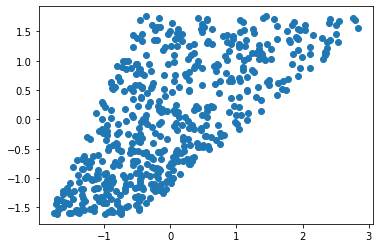

In [122]:
#first with length
x_axis = Tdata['area']
y_axis = Tdata['length']
plt.scatter(x_axis, y_axis)

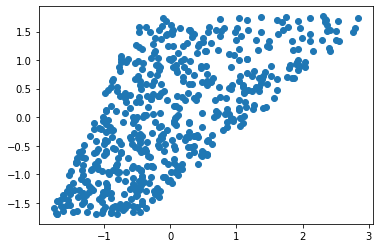

In [127]:
#next with width
x_axis = Tdata['area']
y_axis = Tdata['width']
plt.scatter(x_axis, y_axis)

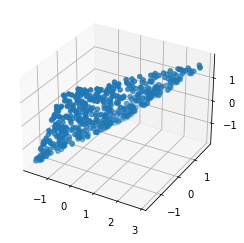

In [128]:
#3d
graph = plt.axes(projection ='3d')
graph.scatter(Tdata['area'],Tdata['length'],Tdata['width'])

# Find the covariance & correlation matrix of the normalized data

In [186]:
covariance = np.cov(Tdata)
correlation = Tdata.corr()

print("covariance:", covariance)
print("correlation:", correlation)

covariance: [[1.79760996 1.85215124 0.88203577 ... 0.75783459 0.73985094 0.60095441]
 [1.85215124 2.73304177 1.00679105 ... 0.45548043 0.73576632 0.71458938]
 [0.88203577 1.00679105 0.85785687 ... 0.54345274 0.55738531 0.63148272]
 ...
 [0.75783459 0.45548043 0.54345274 ... 0.9754555  0.42563357 0.62489632]
 [0.73985094 0.73576632 0.55738531 ... 0.42563357 0.69502257 0.59391114]
 [0.60095441 0.71458938 0.63148272 ... 0.62489632 0.59391114 0.93148017]]
correlation:                      price      area    length     width  bedrooms  bathrooms  \
price             1.000000  0.607827  0.435523  0.407210  0.335762   0.276222   
area              0.607827  1.000000  0.695952  0.677425  0.033856   0.042773   
length            0.435523  0.695952  1.000000 -0.021047  0.071629   0.040536   
width             0.407210  0.677425 -0.021047  1.000000 -0.000656   0.032149   
bedrooms          0.335762  0.033856  0.071629 -0.000656  1.000000   0.373930   
bathrooms         0.276222  0.042773  0.04053

# Find the correlation of length and area.

In [169]:
df =Tdata[["area","length"]]
df_corr = df.corr()

In [170]:
df1=np.array(df_corr)
norm_df = pd.DataFrame(df1)
norm_df

,0,1
0,1.000000,0.695952
1,0.695952,1.000000


<AxesSubplot:>

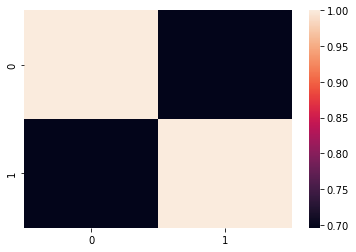

In [171]:
sns.heatmap(norm_df)

# Assuming 3 friends have 5 cities (A,B,C,D,E) to go to, what is the possible state space of this problem? Display the possible state space in a proper way. I&#39;m interested in the random variable where 2 person go to the same city,

In [175]:
city =["A","B","C","D","E"]
combinations =[]
for i in city:
    for j in city:
        for k in city:
            combo=[i,j,k]
            combinations.append(combo)
len(combinations)
for i in combinations:
    print(i)

['A', 'A', 'A']
['A', 'A', 'B']
['A', 'A', 'C']
['A', 'A', 'D']
['A', 'A', 'E']
['A', 'B', 'A']
['A', 'B', 'B']
['A', 'B', 'C']
['A', 'B', 'D']
['A', 'B', 'E']
['A', 'C', 'A']
['A', 'C', 'B']
['A', 'C', 'C']
['A', 'C', 'D']
['A', 'C', 'E']
['A', 'D', 'A']
['A', 'D', 'B']
['A', 'D', 'C']
['A', 'D', 'D']
['A', 'D', 'E']
['A', 'E', 'A']
['A', 'E', 'B']
['A', 'E', 'C']
['A', 'E', 'D']
['A', 'E', 'E']
['B', 'A', 'A']
['B', 'A', 'B']
['B', 'A', 'C']
['B', 'A', 'D']
['B', 'A', 'E']
['B', 'B', 'A']
['B', 'B', 'B']
['B', 'B', 'C']
['B', 'B', 'D']
['B', 'B', 'E']
['B', 'C', 'A']
['B', 'C', 'B']
['B', 'C', 'C']
['B', 'C', 'D']
['B', 'C', 'E']
['B', 'D', 'A']
['B', 'D', 'B']
['B', 'D', 'C']
['B', 'D', 'D']
['B', 'D', 'E']
['B', 'E', 'A']
['B', 'E', 'B']
['B', 'E', 'C']
['B', 'E', 'D']
['B', 'E', 'E']
['C', 'A', 'A']
['C', 'A', 'B']
['C', 'A', 'C']
['C', 'A', 'D']
['C', 'A', 'E']
['C', 'B', 'A']
['C', 'B', 'B']
['C', 'B', 'C']
['C', 'B', 'D']
['C', 'B', 'E']
['C', 'C', 'A']
['C', 'C', 'B']
['C', 'C

# Find the probability of the occurrence of that event.

In [178]:
GTE2=0
NGTE2=0
for i in combinations:
    UniqueSet = set(i) #Gets us the unique entries
    if len(i) != len(UniqueSet):
        GTE2+=1
    else:
        NGTE2+=1
probability_GTE2=GTE2/len(combinations)
probability_NGTE2=NGTE2/len(combinations)

In [179]:
#Prob of 2 or more going to one city
probability_GTE2

0.52

# Plot the probability distribution.

<BarContainer object of 2 artists>

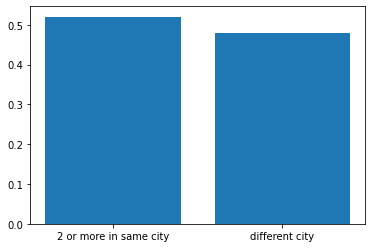

In [182]:
plt.bar(["2 or more in same city","different city"],[probability_GTE2,probability_NGTE2])

# Is it a discrete distribution or a continuous one?

Discrete distribution, because the values are fixed and not continous

# Is it univariate or a multivariate problem?

Multivarient, because there are 3 features 